# Exploratory Data Analysis

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/Tian Le/Downloads/NEER_Economic_Indicators - main.csv")

In [2]:
data.head()

,date,neer,total_domestic_exports,f&b_sales,retail_sales_value,cpi_adjusted,total_merchandise_imports
0,1/1/2011,114.565,22659044.0,607.0,3441.0,90.214,37583825.0
1,1/2/2011,114.870,19710774.0,595.0,2553.0,90.261,32126643.0
2,1/3/2011,114.925,24934088.0,604.0,3071.0,90.341,43060778.0
3,1/4/2011,115.808,23029646.0,603.0,3063.0,91.316,38518652.0
4,1/5/2011,116.310,22893768.0,643.0,3187.0,91.182,39756662.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
date                         123 non-null object
neer                         123 non-null float64
total_domestic_exports       122 non-null float64
f&b_sales                    122 non-null float64
retail_sales_value           122 non-null float64
cpi_adjusted                 122 non-null float64
total_merchandise_imports    122 non-null float64
dtypes: float64(6), object(1)
memory usage: 6.9+ KB


In [34]:
data.describe()

,neer,total_domestic_exports,f&b_sales,retail_sales_value,cpi_adjusted,total_merchandise_imports
count,123.000000,1.220000e+02,122.000000,122.000000,122.000000,1.220000e+02
mean,122.926280,2.160493e+07,780.893443,3547.598361,98.224205,3.863518e+07
std,3.721439,2.232737e+06,98.690585,387.551578,2.392610,3.457933e+06
min,113.694000,1.502432e+07,399.000000,1837.000000,90.214000,2.973120e+07
25%,120.755250,2.006450e+07,724.000000,3332.750000,98.264750,3.650792e+07
50%,123.984000,2.191839e+07,806.500000,3570.000000,99.079000,3.898083e+07
75%,125.596250,2.314426e+07,847.750000,3779.750000,99.562250,4.115613e+07
max,128.305000,2.633696e+07,956.000000,4569.000000,100.776000,4.712705e+07


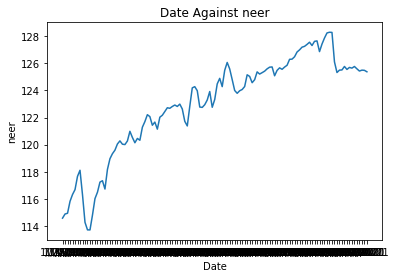

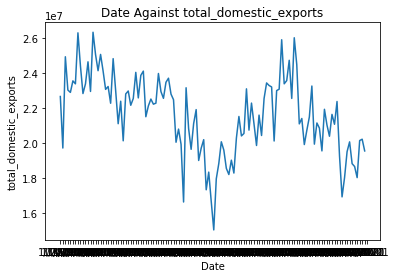

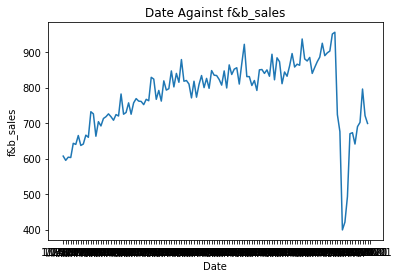

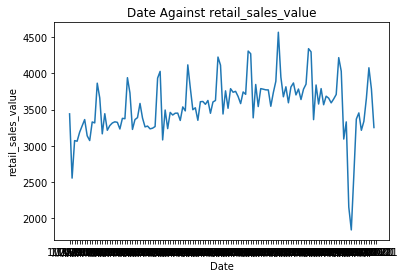

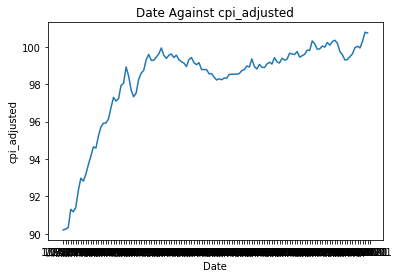

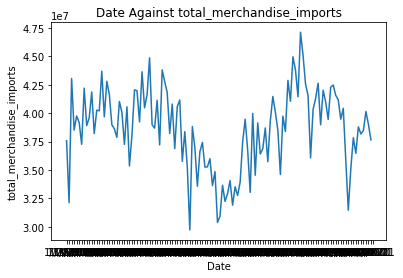

In [7]:
import matplotlib.pyplot as plt

for i in list(data.columns[1:]):
    plt.title("Date Against " + i)
    plt.xlabel("Date")
    plt.ylabel(i)
    plt.plot("date", i, data = data)
    plt.show()

In [5]:
data.corr("pearson")

,neer,total_domestic_exports,f&b_sales,retail_sales_value,cpi_adjusted,total_merchandise_imports
neer,1.000000,-0.419500,0.556183,0.369115,0.850670,-0.053005
total_domestic_exports,-0.419500,1.000000,-0.071133,-0.011890,-0.343404,0.773287
f&b_sales,0.556183,-0.071133,1.000000,0.809808,0.537960,0.099364
retail_sales_value,0.369115,-0.011890,0.809808,1.000000,0.325219,0.137453
cpi_adjusted,0.850670,-0.343404,0.537960,0.325219,1.000000,0.003034
total_merchandise_imports,-0.053005,0.773287,0.099364,0.137453,0.003034,1.000000


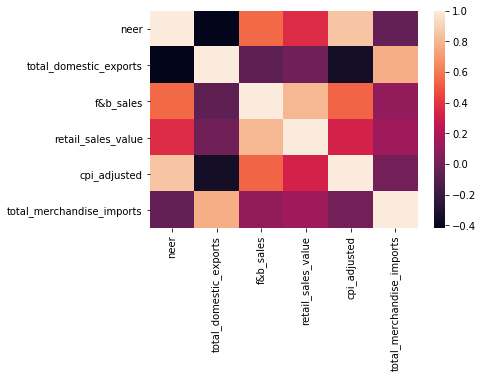

In [6]:
import seaborn as sns
sns.heatmap(data.corr("pearson"));

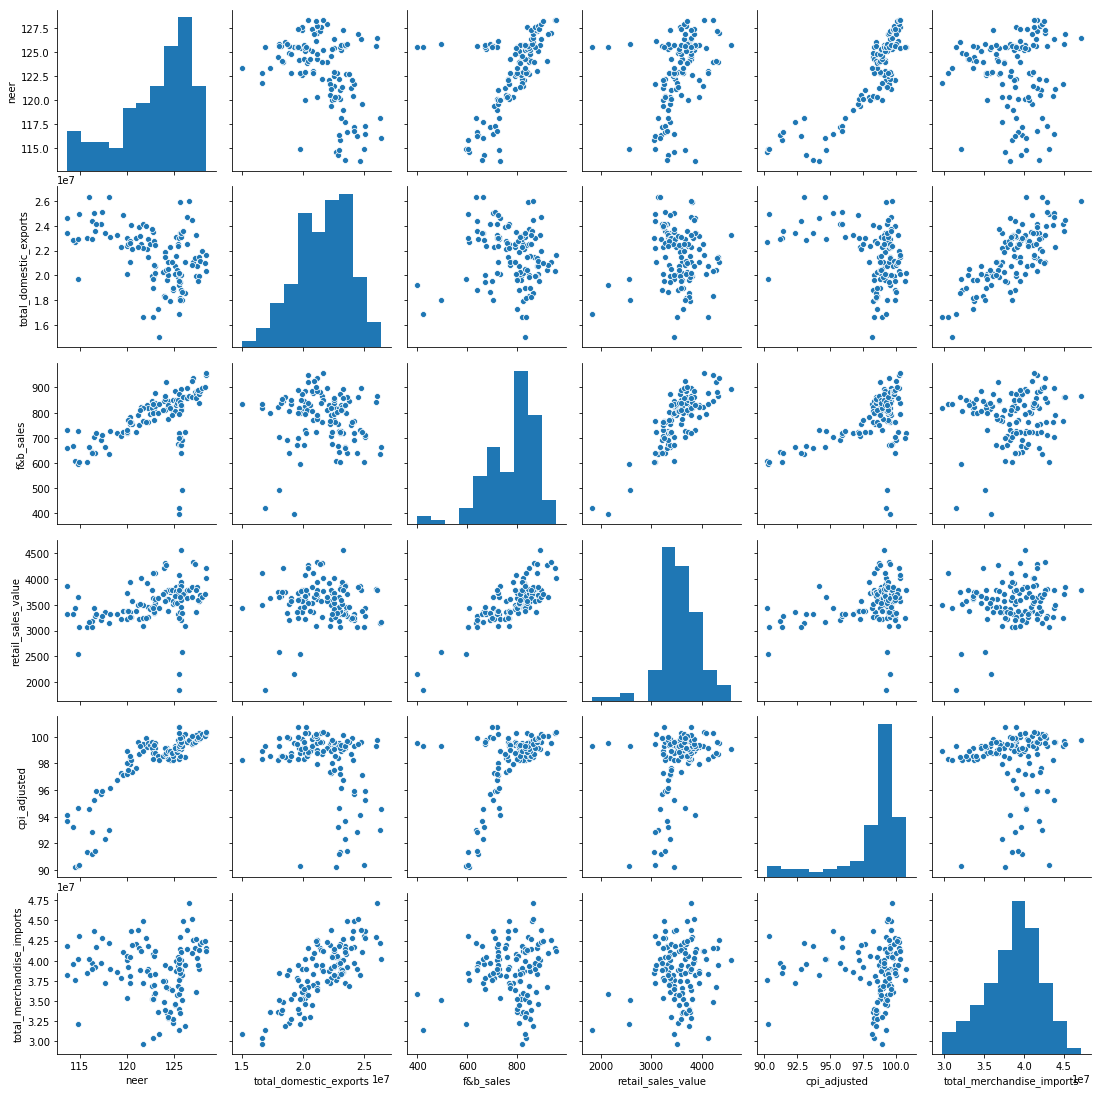

In [9]:
sns.pairplot(data)

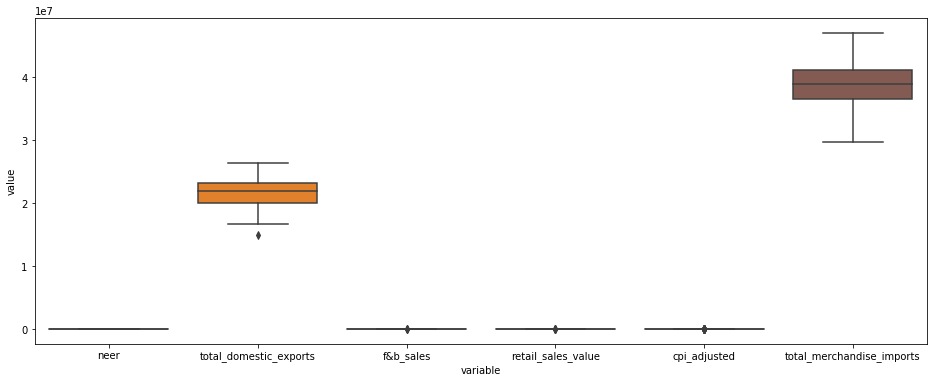

In [29]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(data.iloc[:,1:]))

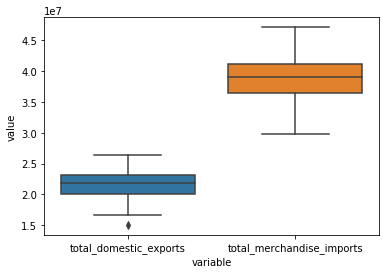

In [30]:
# Because of the Above, we will split the boxplots separately
sns.boxplot(x="variable", y="value", data=pd.melt(data.iloc[:,[2,6]]))

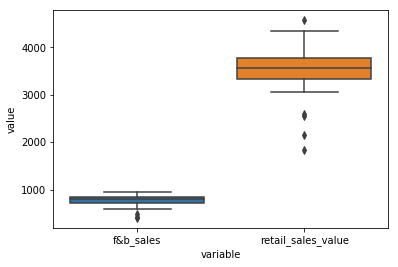

In [32]:
sns.boxplot(x="variable", y="value", data=pd.melt(data.iloc[:,[3,4]]))

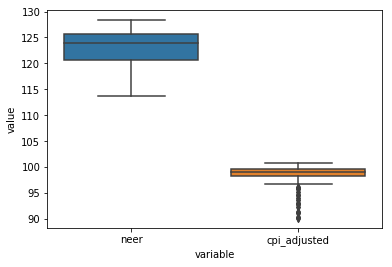

In [33]:
sns.boxplot(x="variable", y="value", data=pd.melt(data.iloc[:,[1,5]]))

In [67]:
# Alternatively, we can visualise the density plot below.
# check each sample predictive distribution
def densityPlot(estimates, variableName):
  sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    
    
  mean_loc = np.mean(estimates)
  plt.vlines(x = mean_loc, ymin = 0, ymax = 0.15, 
               linestyles = '-', colors = 'orange',
               label = 'Mean',
               linewidth = 2.5)
  plt.vlines(x = np.nanpercentile(estimates, 75), ymin = 0, ymax = 0.08, 
               linestyles = ':', colors = 'blue',
               label = '75% Percentile',
               linewidth = 2.5)
  plt.vlines(x = np.nanpercentile(estimates, 25), ymin = 0, ymax = 0.08, 
               linestyles = '-.', colors = 'blue',
               label = '25% Percetile',
               linewidth = 2.5)
  plt.legend(loc = 1)
  plt.title('Density Plot for ' + variableName);
  plt.xlabel('Value'); plt.ylabel('Density');
    
  print('Average Estimate = %0.4f' % mean_loc)
  print('25%% Estimate = %0.4f    75%% Estimate = %0.4f' % (np.nanpercentile(estimates, 25),
                                       np.nanpercentile(estimates, 75)))

Average Estimate = 122.9263
25% Estimate = 120.7552    75% Estimate = 125.5962


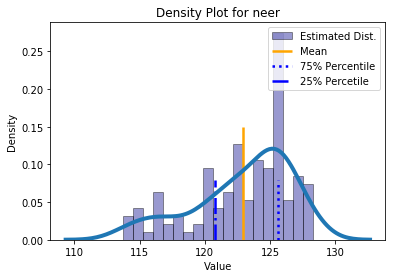

Average Estimate = 21604932.0984
25% Estimate = 20064496.5000    75% Estimate = 23144263.7500


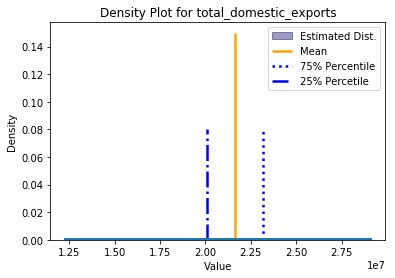

Average Estimate = 780.8934
25% Estimate = 724.0000    75% Estimate = 847.7500


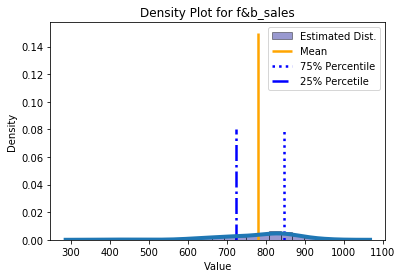

Average Estimate = 3547.5984
25% Estimate = 3332.7500    75% Estimate = 3779.7500


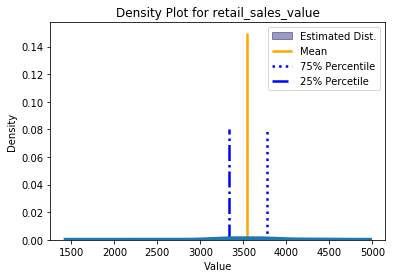

Average Estimate = 98.2242
25% Estimate = 98.2648    75% Estimate = 99.5622


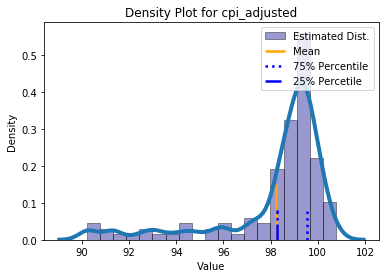

Average Estimate = 38635184.9262
25% Estimate = 36507921.0000    75% Estimate = 41156130.0000


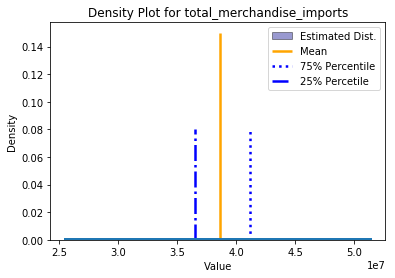

In [68]:
import numpy as np

for i in list(data.columns[1:]):
    densityPlot(data[i], i)
    plt.show()